In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Internship/Alzheimer_s Dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 4098 images belonging to 4 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Internship/Alzheimer_s Dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1023 images belonging to 4 classes.


In [6]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:",class_names)

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [7]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu' , input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_generator, epochs=5, validation_data=val_generator, batch_size= BATCH_SIZE)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 1189s 9s/step - accuracy: 0.5665 - loss: 0.9365 - val_accuracy: 0.3871 - val_loss: 1.3138
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.7412 - loss: 0.6176 - val_accuracy: 0.4702 - val_loss: 1.3025
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9006 - loss: 0.2501 - val_accuracy: 0.5435 - val_loss: 1.3886
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9717 - loss: 0.0855 - val_accuracy: 0.6452 - val_loss: 1.1769
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9900 - loss: 0.0390 - val_accuracy: 0.5425 - val_loss: 2.1697


In [22]:
model.save('/content/drive/MyDrive/Internship/Alzheimer_s Dataset/Model/Train.h5')

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as py
model = load_model('/content/drive/MyDrive/Internship/Alzheimer_s Dataset/Model/Train.h5')
print("Model Loaded")

Model Loaded


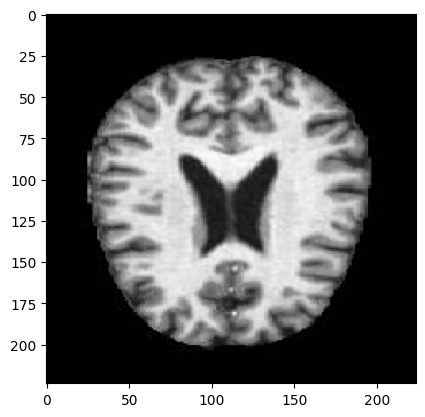

In [24]:
test_image_path="/content/drive/MyDrive/Internship/Alzheimer_s Dataset/test/NonDemented/26 (100).jpg"
img=image.load_img(test_image_path, target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [25]:
img_array=image.img_to_array(img)
img_array=py.expand_dims(img_array,axis=0)
img_array /= 255.

In [26]:
prediction = model.predict(img_array)
ind = py.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
NonDemented
